In [48]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# leggo l'immagine
image_path = 'db/cutted_set/Author1/Author1_0001_01.png'

# carico l'immagine e la passo a torch
image = Image.open(image_path).convert('L')
image_torch = torch.from_numpy(np.array(image))
image_torch_mean = image_torch.mean(dtype=torch.float32)
image_torch = image_torch - image_torch_mean

In [49]:
# analisi di fourier usando fft2d
image_fft = torch.fft.fft2(image_torch, norm='ortho')

In [50]:
# esamino la trasformata di fourier
image_fft_real = image_fft.real
image_fft_imag = image_fft.imag
image_fft_amplitude = torch.abs(image_fft)
image_fft_phase = torch.angle(image_fft)

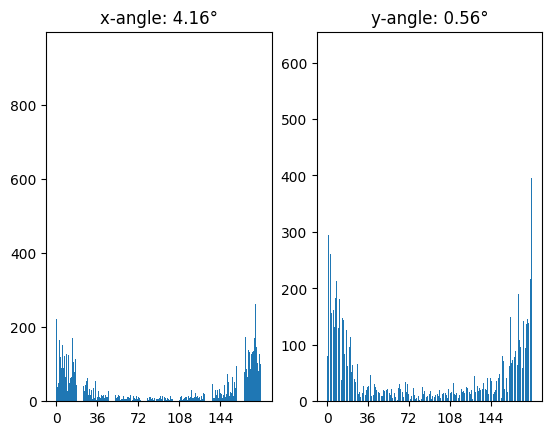

In [17]:
# plotto image_fft_amplitude
row = 16
col = 9
fig, ax = plt.subplots(1, 2)
# mostro un grafico a barre di image_fft_amplitude[row, :]
ax[0].bar(np.arange(image_fft_amplitude.shape[1]), image_fft_amplitude[row, :])
ax[0].set_title('x-angle: {:.2f}°'.format(row/image_fft_amplitude.shape[0]*180))
ax[0].set_xticks(np.arange(0, image_fft_amplitude.shape[1], image_fft_amplitude.shape[1]/5))
ax[0].set_xticklabels(['{:.0f}'.format(i/image_fft_amplitude.shape[1]*180) for i in np.arange(0, image_fft_amplitude.shape[1], image_fft_amplitude.shape[1]/5)])

# mostro un grafico a barre di image_fft_amplitude[:, col]
ax[1].bar(np.arange(image_fft_amplitude.shape[0]), image_fft_amplitude[:, col])
ax[1].set_title('y-angle: {:.2f}°'.format(col/image_fft_amplitude.shape[1]*180))
ax[1].set_xticks(np.arange(0, image_fft_amplitude.shape[0], image_fft_amplitude.shape[0]/5))
ax[1].set_xticklabels(['{:.0f}'.format(i/image_fft_amplitude.shape[0]*180) for i in np.arange(0, image_fft_amplitude.shape[0], image_fft_amplitude.shape[0]/5)])
plt.show()

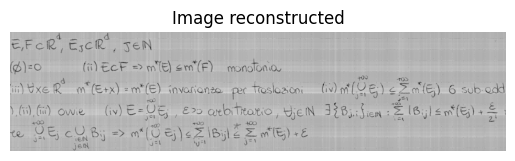

In [18]:
# annullo la prima riga e la prima colonna
image_fft[0, :] = 0
image_fft[:, 0] = 0

# ricostruisco l'immagine
image_reconstructed = torch.fft.ifft2(image_fft, norm='ortho')

# plotto l'immagine ricostruita
plt.imshow((image_reconstructed).real.cpu().numpy(), cmap='gray')
plt.title('Image reconstructed')
plt.axis('off')
plt.show()
image_fft = torch.fft.fft2(image_torch, norm='ortho')

In [29]:
# salvo image_fft_amplitude come fosse un'immagine
image_fft_amplitude = image_fft_amplitude - image_fft_amplitude.min()
image_fft_amplitude = image_fft_amplitude / image_fft_amplitude.max()
image_fft_amplitude = image_fft_amplitude * 255
image_fft_amplitude = image_fft_amplitude.cpu().numpy().astype(np.uint8)
image_fft_amplitude = Image.fromarray(image_fft_amplitude)
image_fft_amplitude.save('image_fft_amplitude.png')
image_fft_amplitude = torch.abs(image_fft)

procedo con la correzione manuale dei pixel

In [56]:
# carico image_fft_amplitude.png
image_fft = torch.fft.fft2(image_torch, norm='ortho')
image_fft_amplitude = torch.abs(image_fft)
image_fft_amplitude_load = torch.from_numpy(np.array(Image.open('image_fft_amplitude.png').convert('L')))
# riproporziono le componenti di image_fft secondo quanto letto in image_fft_amplitude
image_fft_amplitude = torch.abs(image_fft)
image_fft *= image_fft_amplitude_load/image_fft_amplitude
# ricostruisco l'immagine
image_reconstructed = torch.fft.ifft2(image_fft, norm='ortho')
image_reconstructed = image_reconstructed + image_torch_mean

# salvo l'immagine ricostruita
image_reconstructed = image_reconstructed.real.cpu().numpy().astype(np.uint8)
# normalizzo
image_reconstructed = image_reconstructed - image_reconstructed.min()
image_reconstructed = image_reconstructed / image_reconstructed.max()
image_reconstructed = Image.fromarray((image_reconstructed*255).astype(np.uint8))
image_reconstructed.save('image_reconstructed.png')